# Bank - Customer Churn Prediction

### The data set includes information about:

- Customer's account information and their demographic info as well; 
- Credit score, Gender, Age, Tenure, Balance, 
- And also their Number of products that they have, whether they have CC or not, whether their member status, 
    and their estimated salary

## Background Information 

- A Bank usually want to predict their customer status, whether they have intention to exit/churn. 
In this case we will build a model to predict whether the customers according our collected data to predict their behaviour 
in the future.


## Problem Statement

- Churn/Exit of new customers according their historical data

## Business Question

- How does features (demographic information) affect customer's tendency to quit ?
- How to predict customers exit tendency from different group of age
- What's the best machine Learning modeling for this Churn Prediction Case


## Business Goals

- Building a model to predict whether any type of customer having tendency to leave our service.

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sidetable as stb

import warnings
warnings.filterwarnings('ignore')
 
from sklearn import set_config
set_config(print_changed_only=False)

In [66]:
df =pd.read_csv('bank.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [67]:
# Set 'RowNumber' as index, to its look better

df.set_index('RowNumber')

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [68]:
# Data Frame Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [69]:
# Checking and Handling Missing Value

df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### There is no missing value. It is quiet good !!

##### We want to see the description of the dataset, both the numerical and categorical


In [70]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [71]:
df.describe(include='O').T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [72]:
BankDesc=[]

for i in df.columns:
    BankDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        (((df[i].isna().sum())/len(df))*100).round(2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])
    
pd.DataFrame(data=BankDesc,columns=[
    'Data Feature', 'Data Types', 'Null','Null Percentages','Unique','Unique Sample'
])


,Data Feature,Data Types,Null,Null Percentages,Unique,Unique Sample
0,RowNumber,int64,0,0.0,10000,"[3082, 2300]"
1,CustomerId,int64,0,0.0,10000,"[15798310, 15706764]"
2,Surname,object,0,0.0,2932,"[Dennys, Pinto]"
3,CreditScore,int64,0,0.0,460,"[639, 410]"
4,Geography,object,0,0.0,3,"[France, Germany]"
5,Gender,object,0,0.0,2,"[Male, Female]"
6,Age,int64,0,0.0,70,"[39, 53]"
7,Tenure,int64,0,0.0,11,"[7, 10]"
8,Balance,float64,0,0.0,6382,"[123331.36, 159904.79]"
9,NumOfProducts,int64,0,0.0,4,"[2, 3]"


## Checking Outliers

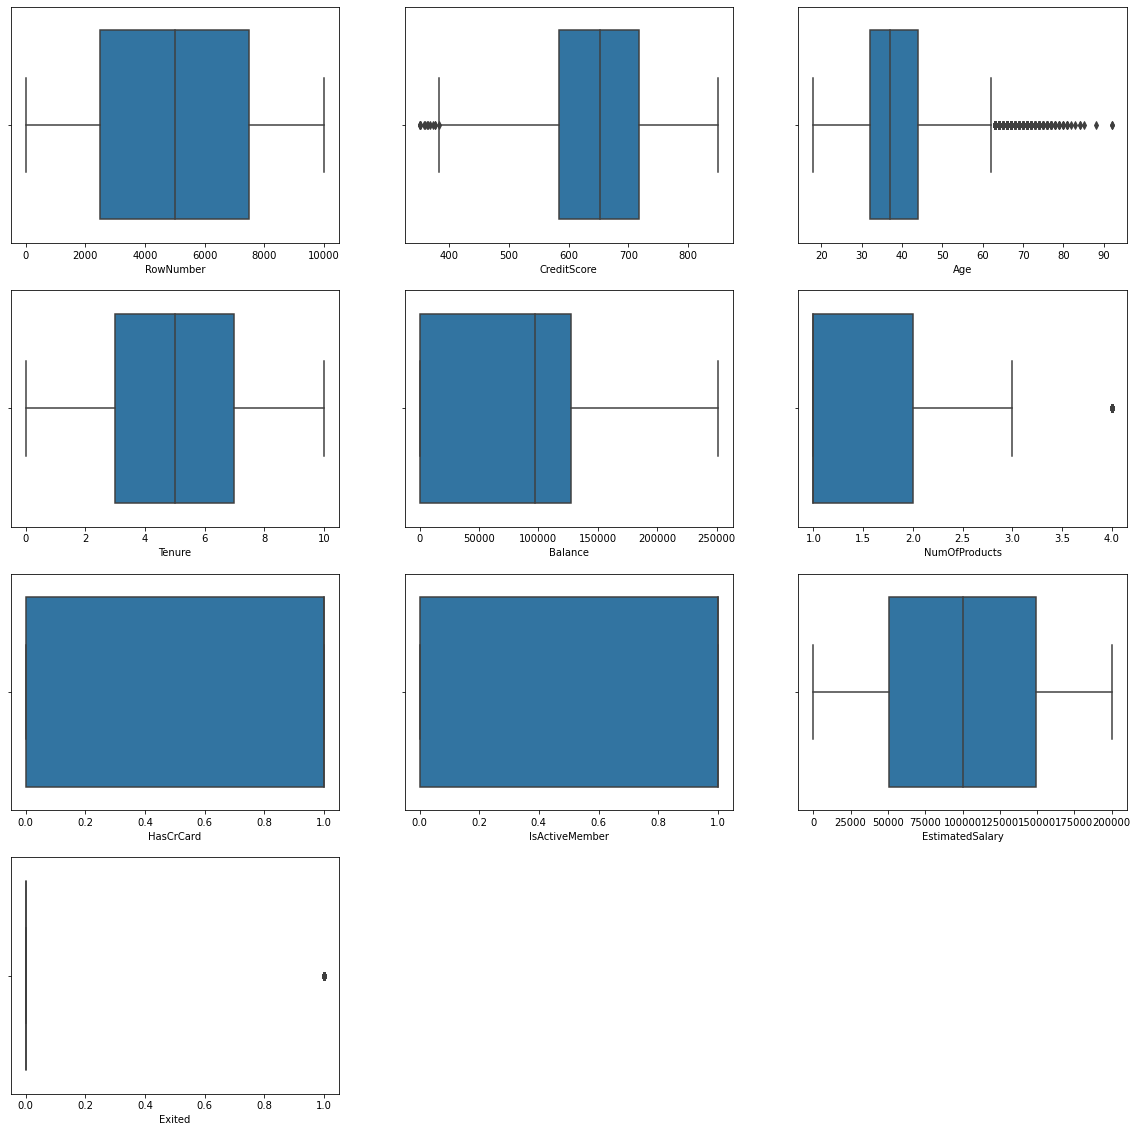

In [74]:
df_describe = df.drop(columns = ['CustomerId', 'Surname'])


plt.figure(figsize = (20, 20))
x = 1      

for column in df_describe.describe():
    plt.subplot(4,3,x)
    sns.boxplot(df[column])
    x += 1


### Most outliers occured in age and creditScore,
### Handling is trying to do a binning the CreditScore and Age.

### Age Binning

- 0-14 years (children), 
- 15-24 years (early working age) 
- 25-54 years (prime working age)
- 55-64 years (mature working age)
- 65 years and over (elderly)

In [75]:
age_binning = [15, 25, 55, 65, df['Age'].max()]
label = ['early working age', 'prime working age', 'mature working age', 'elderly']

df['Age_group'] = pd.cut(df['Age'], bins = age_binning, labels = label)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_group
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,prime working age
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,prime working age
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,prime working age
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,prime working age
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,prime working age


### CreditScore Binning

- 0 - 350: Bronze
- 350 - 550: Silver
- 550 - 750: Gold
- 750 - 850: Platinum

In [134]:
CreditScore_group = [0,350, 550, 750, df['CreditScore'].max()]
label = ['Bronze', 'Silver', 'Gold','Platinum']

df['Credit Score Class'] = pd.cut(df['CreditScore'], bins = CreditScore_group, labels = label)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_group,Credit Score Class
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,prime working age,Gold
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,prime working age,Gold
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,prime working age,Silver
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,prime working age,Gold
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,prime working age,Platinum


## Checking outliers on Estimated Salary

In [77]:
df.loc[(df['EstimatedSalary']==11.58)|(df['EstimatedSalary']==199992.48)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_group,Credit Score Class
2362,2363,15791053,Lucciano,709,Germany,Male,45,4,122917.71,1,1,1,11.58,1,prime working age,Gold
6646,6647,15662021,Lucciano,685,Spain,Female,42,2,0.00,2,0,0,199992.48,0,prime working age,Gold


### Dropping outliers on estimated salary who only has 11.98 salary, because it doesn't seem right, person earning 11.58 per year, meanwhile we keep the highest with 199992.48

In [78]:
df['EstimatedSalary'] = df['EstimatedSalary'].replace(11.58, np.nan)
df.isna().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       1
Exited                0
Age_group             0
Credit Score Class    0
dtype: int64

In [79]:
df.dropna(inplace=True)
df.isna().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Age_group             0
Credit Score Class    0
dtype: int64

In [80]:
df.loc[(df['Balance']==0)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_group,Credit Score Class
0,1,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.88,1,prime working age,Gold
3,4,15701354,Boni,699,France,Female,39,1,0.0,2,0,0,93826.63,0,prime working age,Gold
6,7,15592531,Bartlett,822,France,Male,50,7,0.0,2,1,1,10062.80,0,prime working age,Platinum
11,12,15737173,Andrews,497,Spain,Male,24,3,0.0,2,1,0,76390.01,0,early working age,Silver
12,13,15632264,Kay,476,France,Female,34,10,0.0,2,1,0,26260.98,0,prime working age,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,15605622,McMillan,841,Spain,Male,28,4,0.0,2,1,1,179436.60,0,prime working age,Platinum
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2,0.0,1,1,0,195192.40,0,prime working age,Gold
9994,9995,15719294,Wood,800,France,Female,29,2,0.0,2,0,0,167773.55,0,prime working age,Platinum
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.0,2,1,0,96270.64,0,prime working age,Platinum


#### Since we got almost 3617 customers who dont have balance, so we keep this outlier

# Let's Do the Exploratory Data Analysis !

## Data Analysis

### Univariate Analysis

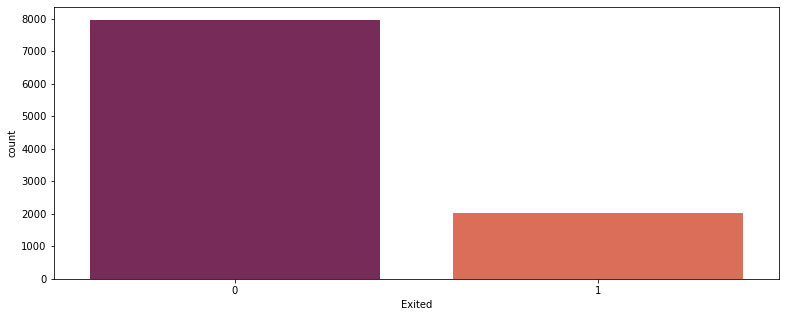

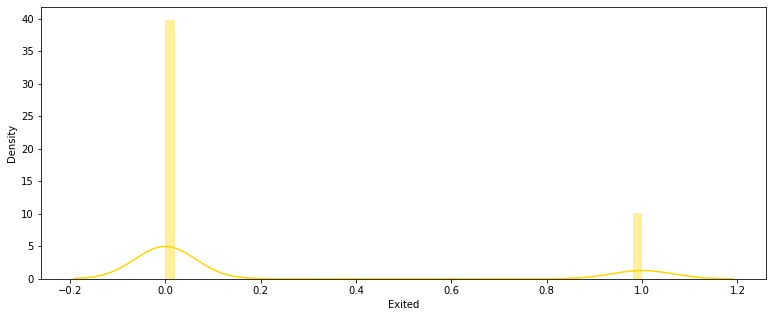

   Exited  count    percent
0       0   7963  79.637964
1       1   2036  20.362036

 Only 20.37% of our customers who got tendency to quit


In [132]:
plt.figure(figsize = (13, 5))
sns.countplot(df['Exited'], palette = 'rocket')
plt.show()
plt.figure(figsize = (13, 5))
sns.distplot(df['Exited'], color='gold')
plt.show()

print(df.stb.freq(['Exited'], cum_cols = False))
print('\n Only 20.37% of our customers who got tendency to quit')

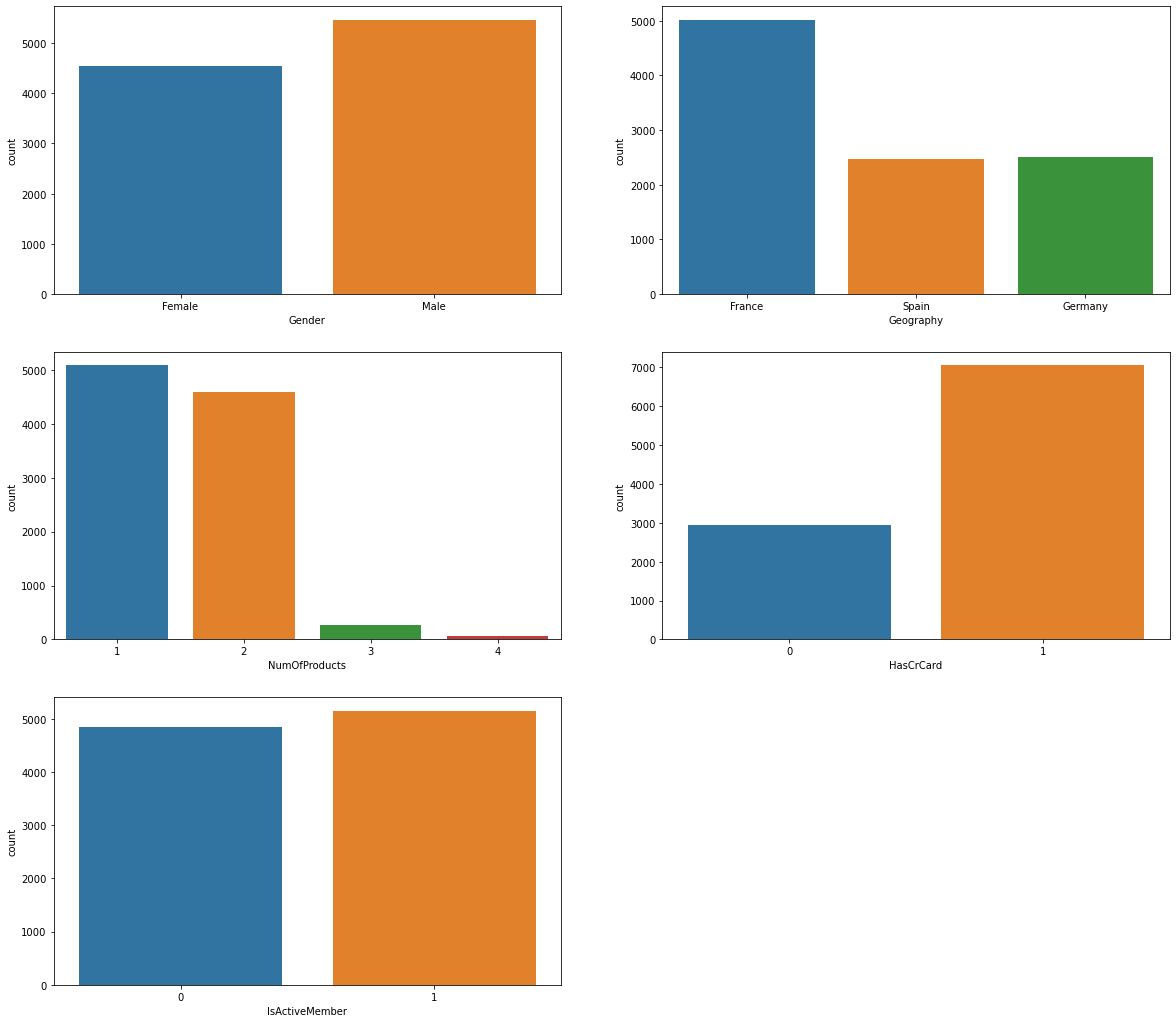

   Gender  count    percent
0    Male   5456  54.565457
1  Female   4543  45.434543

 Our male customers are slightly higher than our female customers with about 55%


  Geography  count    percent
0    France   5014  50.145015
1   Germany   2508  25.082508
2     Spain   2477  24.772477

 Most of our customers are French.


   NumOfProducts  count    percent
0              1   5083  50.835084
1              2   4590  45.904590
2              3    266   2.660266
3              4     60   0.600060

 Most of our customers are having 1-2 product(s)


   HasCrCard  count    percent
0          1   7054  70.547055
1          0   2945  29.452945

 About 70% of our customers are having credit card.


   IsActiveMember  count    percent
0               1   5150  51.505151
1               0   4849  48.494849

 Half of our customers are note acive member.


In [125]:
plt.figure(figsize = (20, 18))

plt.subplot(3,2,1)
sns.countplot(df['Gender'])

plt.subplot(3,2,2)
sns.countplot(df['Geography'])

plt.subplot(3,2,3)
sns.countplot(df['NumOfProducts'])

plt.subplot(3,2,4)
sns.countplot(df['HasCrCard'])

plt.subplot(3,2,5)
sns.countplot(df['IsActiveMember'])

plt.show()

print(df.stb.freq(['Gender'], cum_cols = False))
print('\n Our male customers are slightly higher than our female customers with about 55%\n\n')

print(df.stb.freq(['Geography'], cum_cols = False))
print('\n Most of our customers are French.\n\n')

print(df.stb.freq(['NumOfProducts'], cum_cols = False))
print('\n Most of our customers are having 1-2 product(s)\n\n')

print(df.stb.freq(['HasCrCard'], cum_cols = False))
print('\n About 70% of our customers are having credit card.\n\n')

print(df.stb.freq(['IsActiveMember'], cum_cols = False))
print('\n Half of our customers are note acive member.')

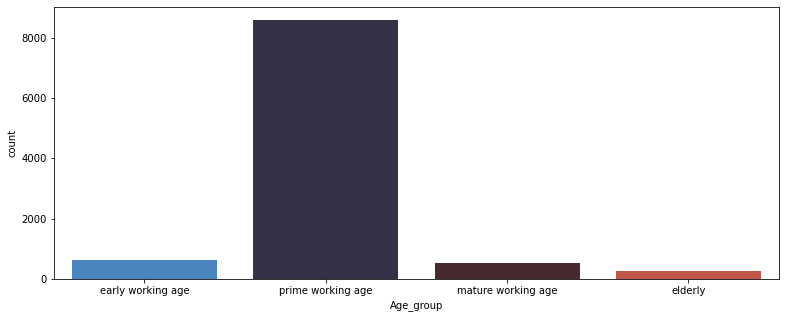

            Age_group  count    percent
0   prime working age   8588  85.888589
1   early working age    611   6.110611
2  mature working age    536   5.360536
3             elderly    264   2.640264

 Most of our customers are in prime Working age


In [84]:
plt.figure(figsize = (13, 5))
sns.countplot(df['Age_group'], palette = 'icefire')
plt.show()

print(df.stb.freq(['Age_group'], cum_cols = False))
print('\n Most of our customers are in prime Working age')

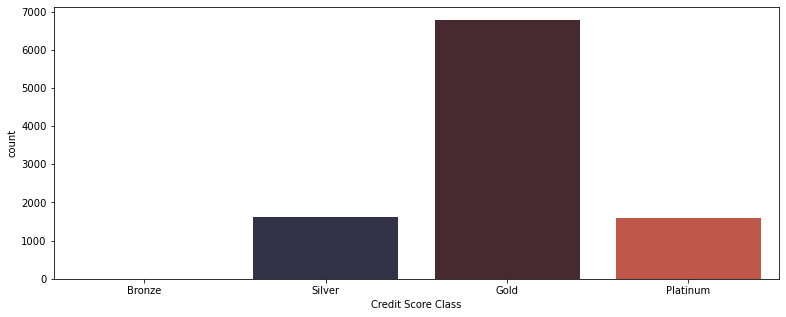

  Credit Score Class  count    percent
0               Gold   6780  67.806781
1             Silver   1616  16.161616
2           Platinum   1598  15.981598
3             Bronze      5   0.050005

 Most of our customers are in Gold Class


In [85]:
plt.figure(figsize = (13, 5))
sns.countplot(df['Credit Score Class'], palette = 'icefire')
plt.show()

print(df.stb.freq(['Credit Score Class'], cum_cols = False))
print('\n Most of our customers are in Gold Class')

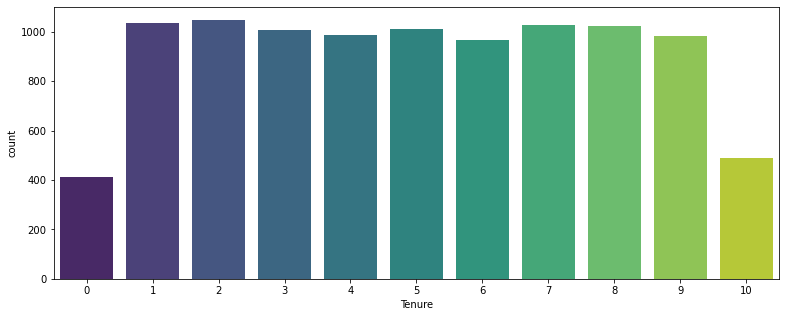

    Tenure  count    percent
0        2   1048  10.481048
1        1   1035  10.351035
2        7   1028  10.281028
3        8   1025  10.251025
4        5   1012  10.121012
5        3   1009  10.091009
6        4    988   9.880988
7        9    984   9.840984
8        6    967   9.670967
9       10    490   4.900490
10       0    413   4.130413

 Most of our customers are having tenure between 1-9 years


In [86]:
plt.figure(figsize = (13, 5))
sns.countplot(df['Tenure'], palette = 'viridis')
plt.show()

print(df.stb.freq(['Tenure'], cum_cols = False))
print('\n Most of our customers are having tenure between 1-9 years')

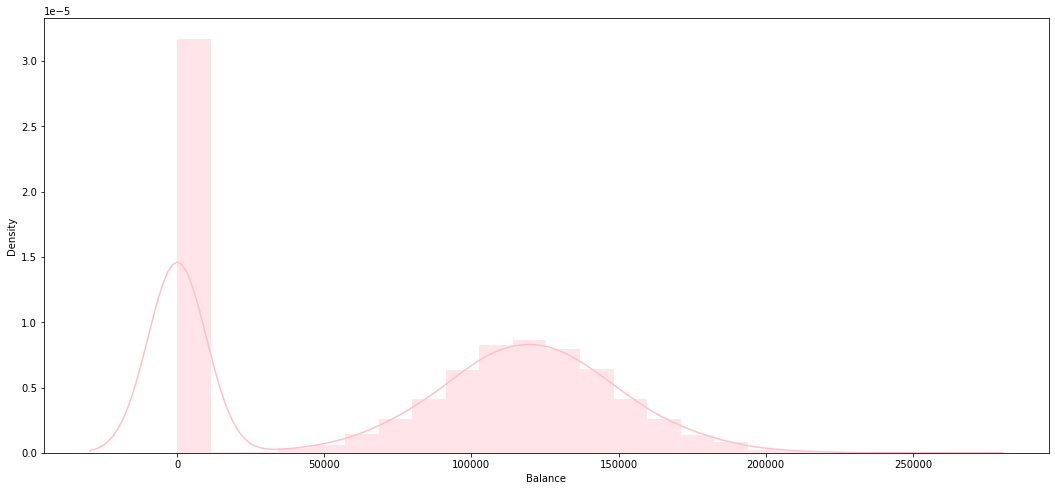

In [136]:
plt.figure(figsize = (18, 8))
sns.distplot(df['Balance'], color='pink')
plt.show()

### Multivariate Analysis

### Gender and Exited

Exited         0         1
Gender                    
Female  0.749285  0.250715
Male    0.835594  0.164406


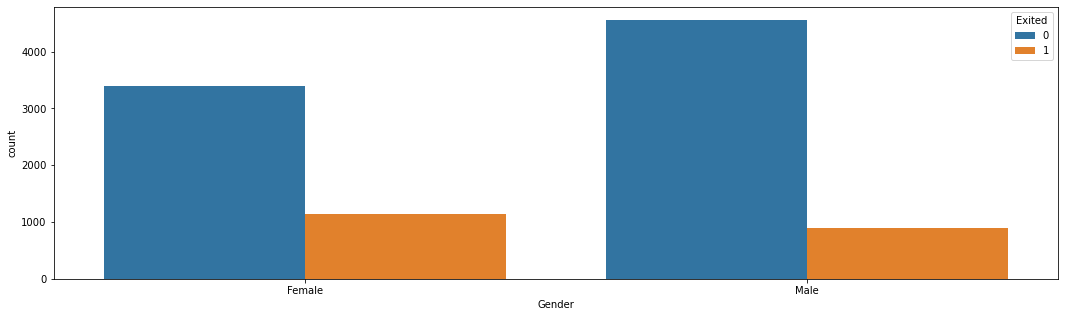

In [92]:
print(pd.crosstab(index = df['Gender'], columns = df['Exited'], normalize = 'index'))
plt.figure(figsize = (18, 5))
sns.countplot(df['Gender'], hue = df['Exited'])
plt.show()

#### Both female or male are mostly like to continue with our services.

### Average age and Exited

col_0    Age Mean
Exited           
0       37.408389
1       44.837917


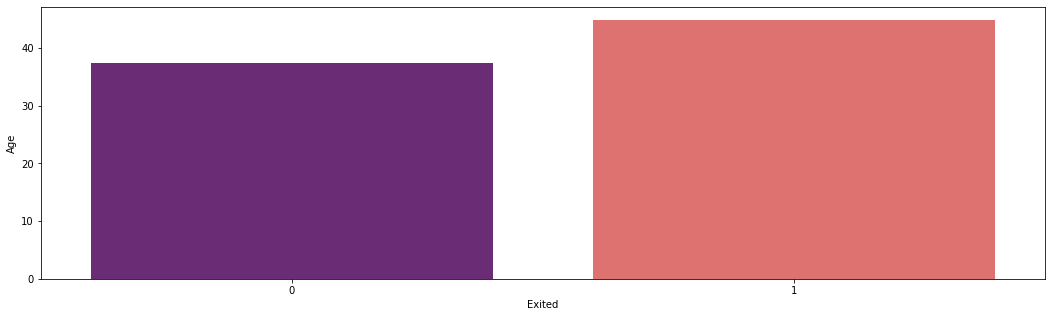

In [96]:
print(pd.crosstab(index = df['Exited'], columns = 'Age Mean', values = df['Age'], aggfunc='mean'))

plt.figure(figsize = (18, 5))
sns.barplot(x = df['Exited'], y = df['Age'], palette = 'magma', ci = False)
plt.show()

#### The average age of customer who is likely to churn is 45 years old, while for customers who is willing to stay is 37 years old. This shows that age doesn'r really have impacts on customer's decission to churn.

### Geography and Exited

Exited            0         1
Geography                    
France     0.838452  0.161548
Germany    0.675837  0.324163
Spain      0.833266  0.166734


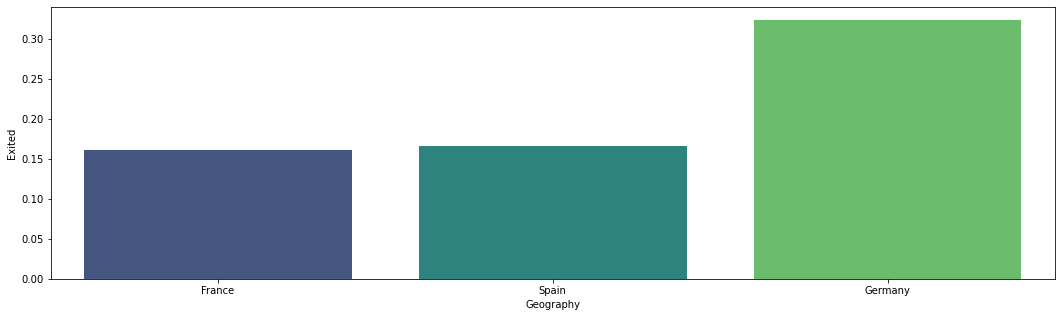

In [120]:
print(pd.crosstab(index = df['Geography'], columns = df['Exited'], normalize = 'index'))

plt.figure(figsize = (18, 5))
sns.barplot(x = df['Geography'], y = df['Exited'], palette = 'viridis', ci = False)
plt.show()

#### The tendency to churn is to see, that Germans are highest who probably churn with 32%.

### Age group and Exited

Exited                     0         1
Age_group                             
early working age   0.924714  0.075286
prime working age   0.802515  0.197485
mature working age  0.516791  0.483209
elderly             0.867424  0.132576


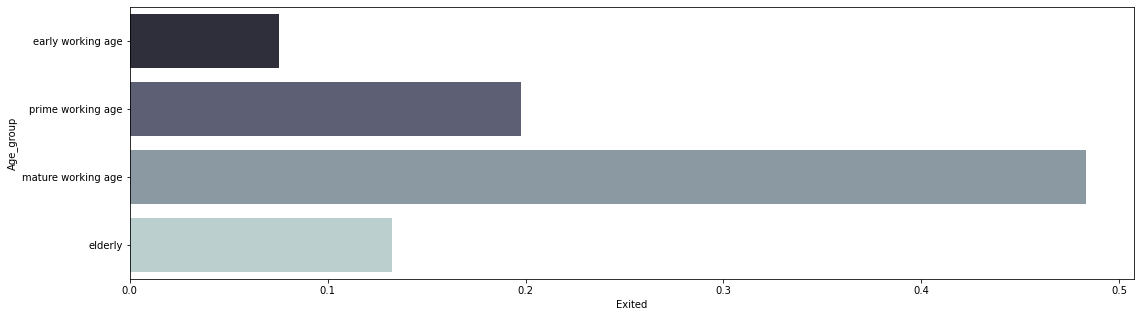

In [99]:
print(pd.crosstab(index = df['Age_group'], columns = df['Exited'], normalize = 'index'))

plt.figure(figsize = (18, 5))
sns.barplot(x = df['Exited'], y = df['Age_group'], palette = 'bone', ci = False)
plt.show()

#### The mature working age people are likely to churn with highest possibility (almost 50%), then come customers on prime working age.

### Credit Score Class and Exited

Credit Score Class  Bronze    Silver      Gold  Platinum
Exited                                                  
0                      0.0  0.775371  0.800147   0.80413
1                      1.0  0.224629  0.199853   0.19587


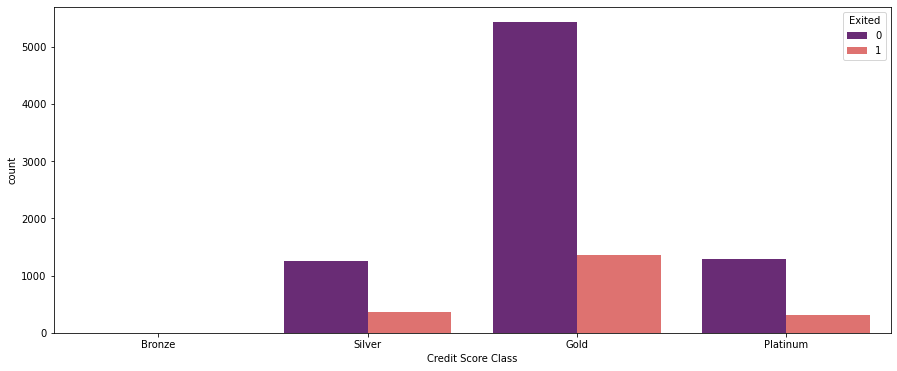

In [118]:
print(pd.crosstab(index = df['Exited'], columns = df['Credit Score Class'], normalize = 'columns'))

plt.figure(figsize = (15, 6))
sns.countplot(df['Credit Score Class'], hue = df['Exited'], palette='magma')
plt.show()

#### According to our credit Score class, it is to see that most of our customers don't really have tendency tom churn.

### Customers with credit card and exited

HasCrCard         0         1
Exited                       
0          0.292854  0.707146
1          0.301081  0.698919


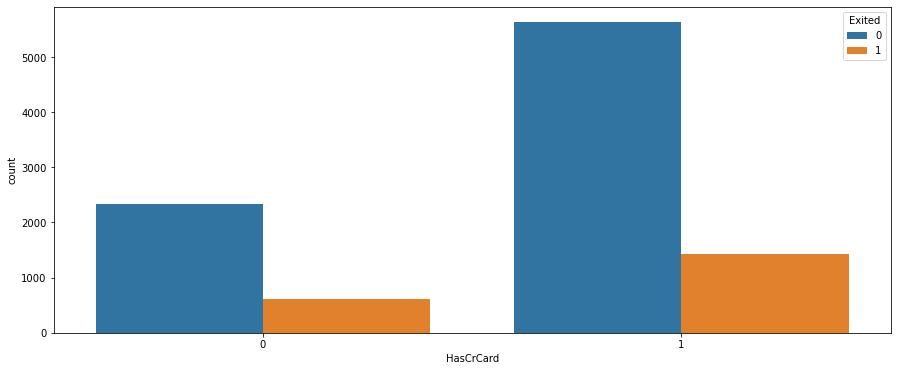

In [119]:
print(pd.crosstab(index = df['Exited'], columns = df['HasCrCard'], normalize = 'index'))

plt.figure(figsize = (15, 6))
sns.countplot(df['HasCrCard'], hue = df['Exited'])
plt.show()

#### It is to see, that most of our customers who have creditcards, have tendency to churn.

### Average Balance and exited

col_0   Average Balance
Exited                 
0          72745.296779
1          91092.915972


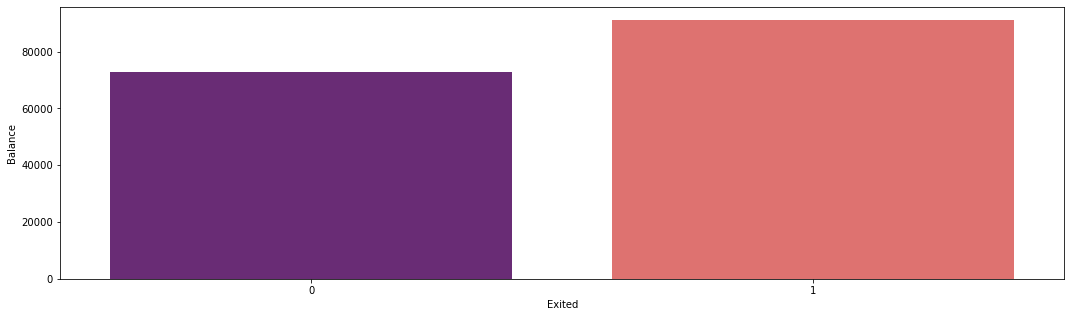

In [133]:
print(pd.crosstab(index = df['Exited'], columns = 'Average Balance', values = df['Balance'], aggfunc='mean'))

plt.figure(figsize = (18, 5))
sns.barplot(x = df['Exited'], y = df['Balance'], palette = 'magma', ci = False)
plt.show()

#### The higher Average Balance ofour customers, that is more likely to churn.

### Tenure based on CreditScore

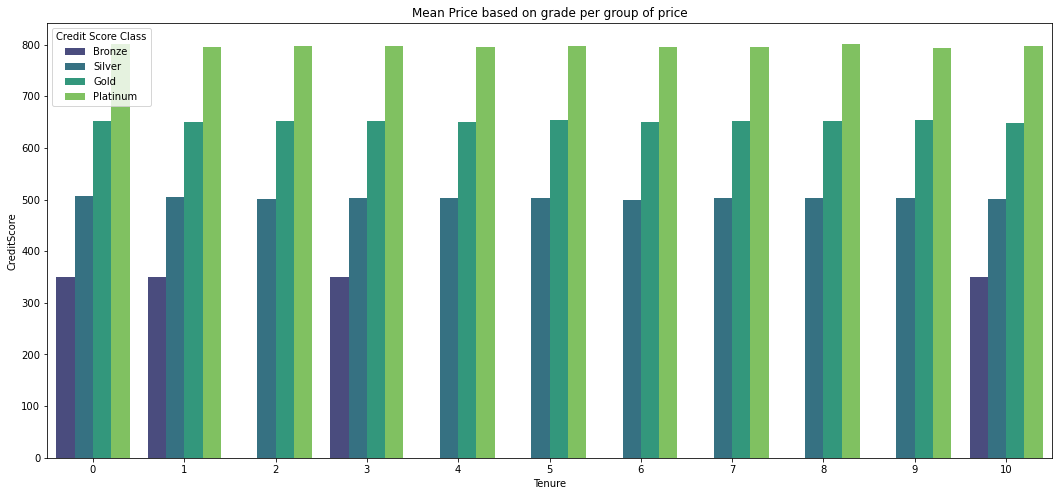

In [138]:
plt.figure(figsize = (18, 8))
sns.barplot(x = df['Tenure'], y = df['CreditScore'], hue = df['Credit Score Class'], palette='viridis',ci = False)
plt.title('Mean Price based on grade per group of price')
plt.show()

#### On each tenure , it is more likely to see that our customers are on Platinum class.  

#### Higher Tenure = More Loyal

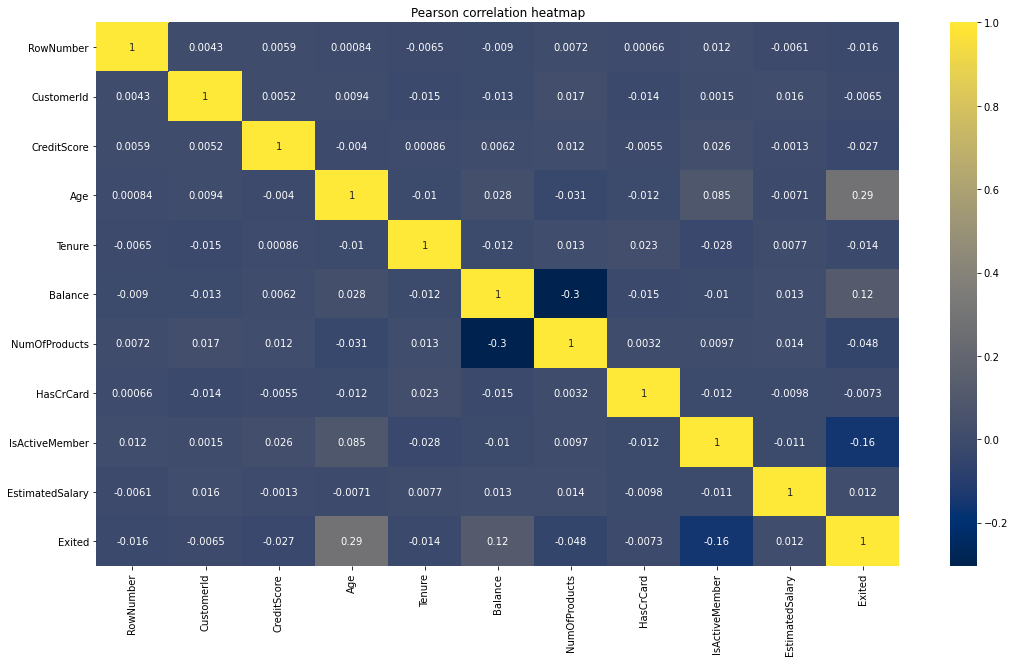

In [123]:
df.corr()

plt.figure(figsize=(18,10))
sns.heatmap(df.corr(), annot=True, cmap='cividis')
plt.title('Pearson correlation heatmap')
plt.show()

## Summary

- We are already on right with keeping our customers to be loyal. 

- Only 20.37% of our customers who got tendency to quit

- Most of our customers are in prime Working age (25-54 years old)

- Most of our customers are french, they are like to sp

- Our male customers are slightly higher than our female customers with about 55%

- Most of our customers are having 1-2 product(s)

- About 70% of our customers are having credit card.

- Half of our customers are note acive member.



## Recommendation

- Before deciding Applications, there are several factors, we need to consider.

- Pay attention more at the German, because they tend mostly to leave.
    - Perhabs we can do more special campaigns only for Germany.

- We should make more interesting and beneficial products targeting our 'Mature working age' class.
    - Some of them are likely in their lifephase short before retirement, any programms that support their retirement plan would be really helpful and can make them feel happier :D 